In [43]:
!unzip "/content/archive (14).zip"

Archive:  /content/archive (14).zip
replace credit_risk_dataset.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: credit_risk_dataset.csv  


In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
df=pd.read_csv("/content/credit_risk_dataset.csv")

In [46]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [48]:
df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [49]:
df.shape

(32581, 12)

In [50]:
df.isnull().sum()

,0
person_age,0
person_income,0
person_home_ownership,0
person_emp_length,895
loan_intent,0
loan_grade,0
loan_amnt,0
loan_int_rate,3116
loan_status,0
loan_percent_income,0


In [51]:
df['person_emp_length']=df['person_emp_length'].fillna(df['person_emp_length'].median())

In [52]:
df['loan_int_rate']=df['loan_int_rate'].fillna(df['loan_int_rate'].median())

In [53]:
df.duplicated().sum()

np.int64(165)

In [54]:
df.drop_duplicates(inplace=True)

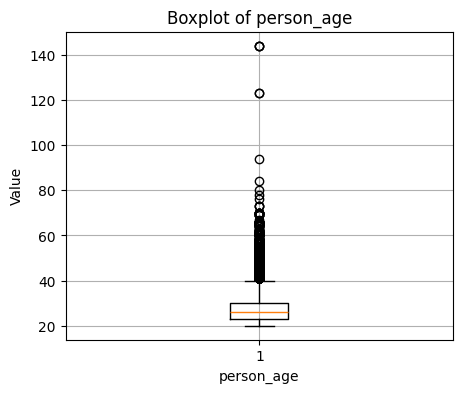

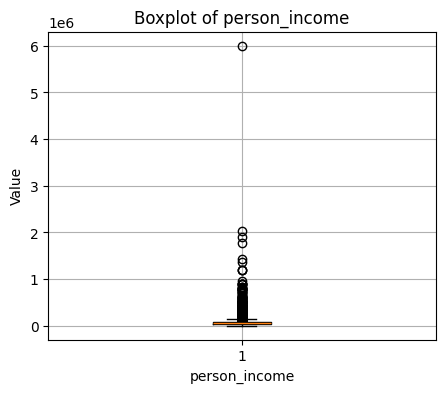

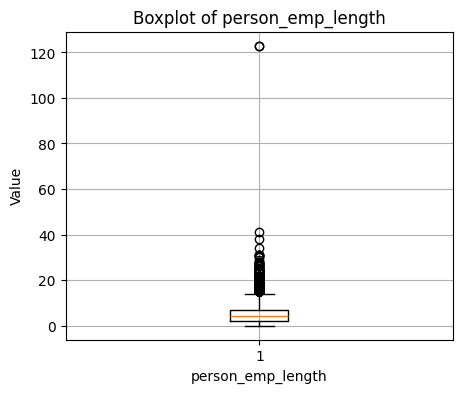

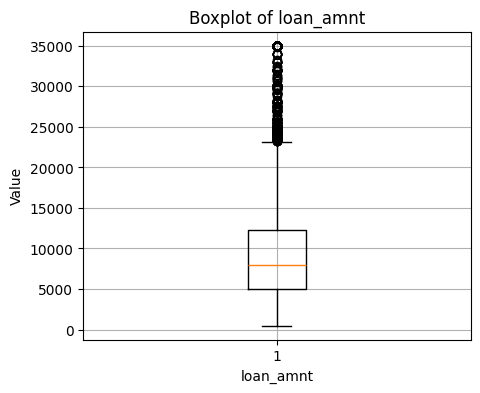

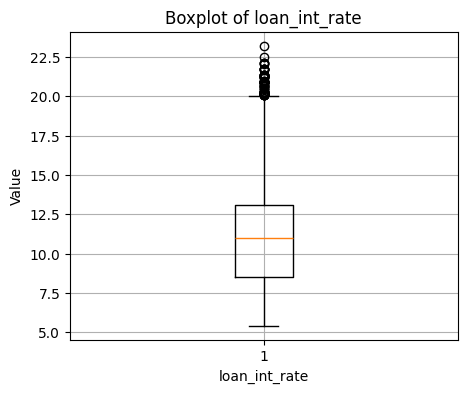

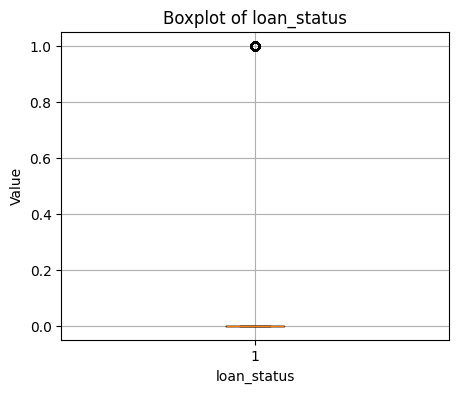

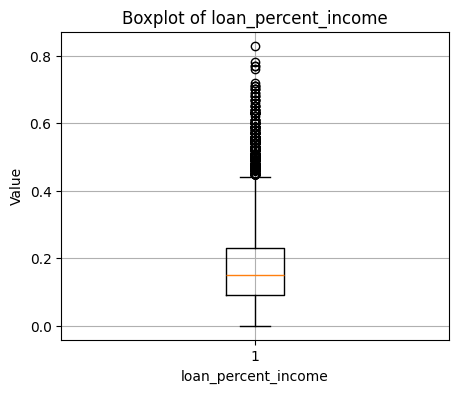

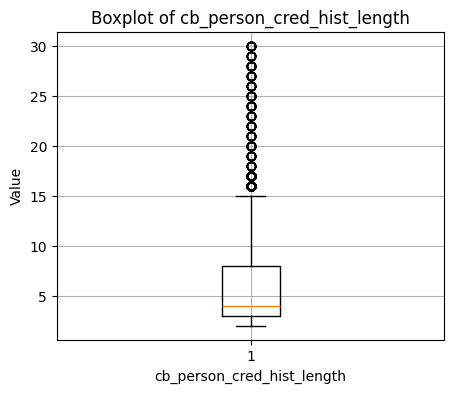

In [55]:


numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns

for col in numeric_cols:
    plt.figure(figsize=(5, 4))
    plt.boxplot(df[col].dropna())
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.grid(True)
    plt.show()




In [56]:
def remove_outliers(df, columns):

    for column in columns:
        if column in df.columns:
            Q1 = df[column].quantile(0.25)
            Q3 = df[column].quantile(0.75)
            IQR = Q3 - Q1
            lower_bound = Q1 - 1.5 * IQR
            upper_bound = Q3 + 1.5 * IQR


            df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df


In [57]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df_clean = remove_outliers(df, numeric_cols)


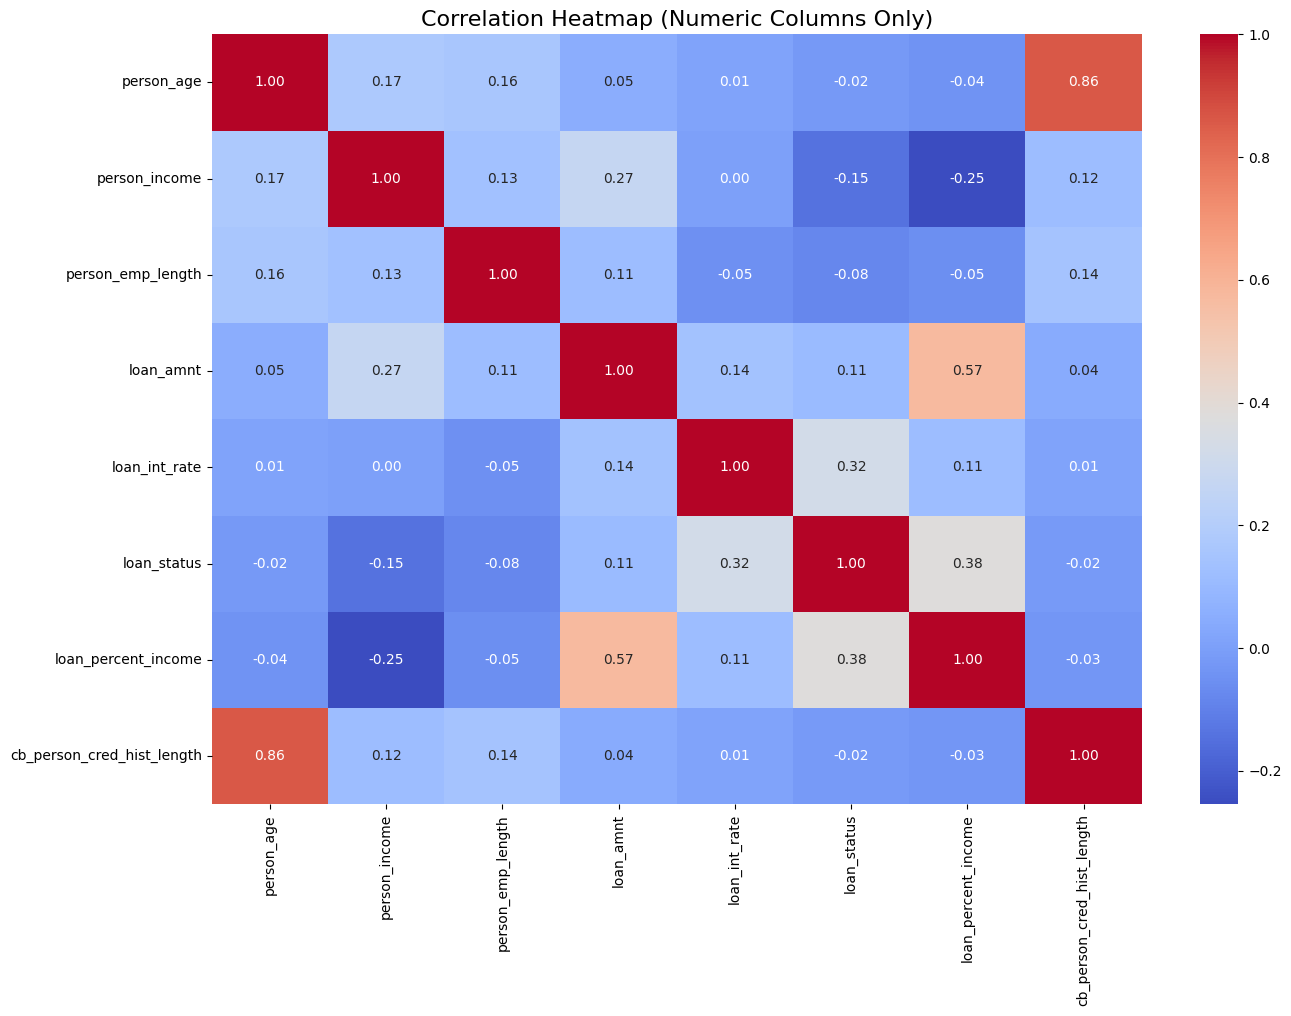

In [59]:
numeric_df = df.select_dtypes(include=['int64', 'float64'])
corr = numeric_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")

plt.title("Correlation Heatmap (Numeric Columns Only)", fontsize=16)
plt.show()

In [60]:
from sklearn.preprocessing import LabelEncoder
labelincoder=LabelEncoder()
df['person_home_ownership']=labelincoder.fit_transform(df['person_home_ownership'])
df['loan_intent']=labelincoder.fit_transform(df['loan_intent'])
df['loan_grade']=labelincoder.fit_transform(df['loan_grade'])
df['cb_person_default_on_file']=labelincoder.fit_transform(df['cb_person_default_on_file'])


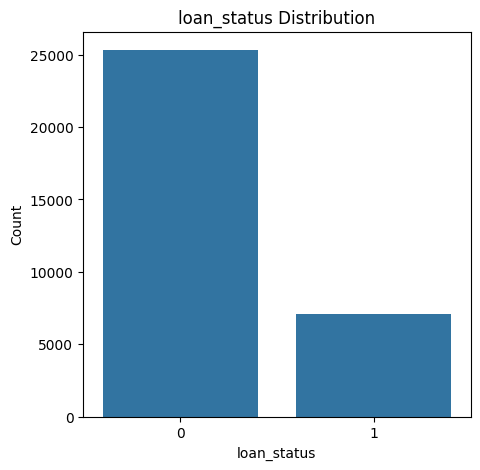

In [61]:
df['loan_status'] = df['loan_status'].replace({'Yes': 1, 'No': 0}).astype(int)


plt.figure(figsize=(5,5))
sns.countplot(x='loan_status', data=df)
plt.xlabel('loan_status')
plt.ylabel('Count')
plt.title('loan_status Distribution')
plt.show()

In [62]:
df

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,3,123.0,4,3,35000,16.02,1,0.59,1,3
1,21,9600,2,5.0,1,1,1000,11.14,0,0.10,0,2
2,25,9600,0,1.0,3,2,5500,12.87,1,0.57,0,3
3,23,65500,3,4.0,3,2,35000,15.23,1,0.53,0,2
4,24,54400,3,8.0,3,2,35000,14.27,1,0.55,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,0,1.0,4,2,5800,13.16,0,0.11,0,30
32577,54,120000,0,4.0,4,0,17625,7.49,0,0.15,0,19
32578,65,76000,3,3.0,2,1,35000,10.99,1,0.46,0,28
32579,56,150000,0,5.0,4,1,15000,11.48,0,0.10,0,26


In [63]:
x=df.drop('loan_status',axis=1)
y=df['loan_status']

In [99]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [103]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_train, y_train= smote.fit_resample(x_train, y_train)

In [104]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [105]:
from sklearn.preprocessing import RobustScaler
scaler =RobustScaler()
x_train= scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [107]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [108]:
y_pred=model.predict(x_test)


In [109]:
from sklearn.metrics import accuracy_score
accuracy_test = accuracy_score(y_test, y_pred)

print("Accuracy on test data: ", accuracy_test)

Accuracy on test data:  0.7785016286644951


In [110]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

k = 20
error = []
accuracy = []
for i in range(1, k , 2):
  knn = KNeighborsClassifier(n_neighbors = i)
  knn.fit(x_train, y_train)
  y_pred = knn.predict(x_test)
  error.append(1-metrics.accuracy_score(y_test, y_pred))
  accuracy.append(metrics.accuracy_score(y_test, y_pred))

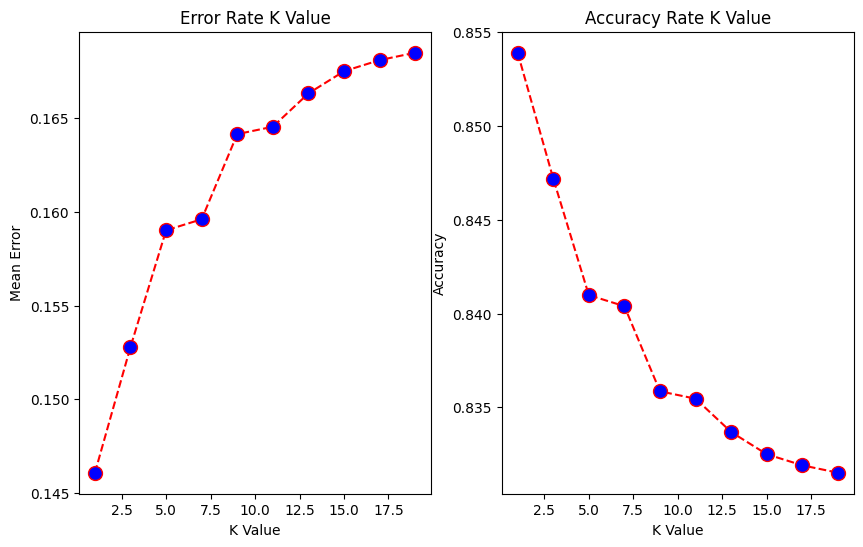

In [112]:
plt.figure(figsize = (10, 6))
plt.subplot(1,2,1)
plt.plot(range(1,k, 2), error, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

plt.subplot(1,2,2)
plt.plot(range(1,k,2 ), accuracy, color = 'red', linestyle = 'dashed', marker = 'o', markerfacecolor = 'blue', markersize = 10)
plt.title('Accuracy Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Accuracy')
plt.show()

In [113]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors= 1)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [114]:
y_pred = knn.predict(x_test)

In [115]:
accuracy_test = accuracy_score(y_test, y_pred)
print("Accuracy on test data: ", accuracy_test)

Accuracy on test data:  0.8539137301352285


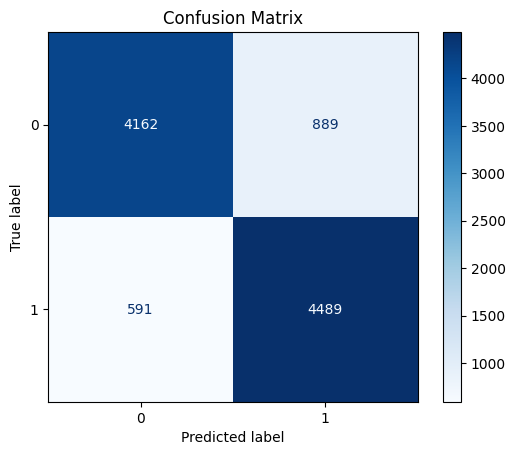

In [116]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test,y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Confusion Matrix")
plt.show()

In [117]:
from sklearn.model_selection import GridSearchCV
params = {'n_neighbors': [3,5,7,9]}
grid = GridSearchCV(KNeighborsClassifier(), params, cv = 5, refit= True)
grid.fit(x_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9]})

In [118]:
print(grid.best_params_)

{'n_neighbors': 3}


In [119]:
test_score = grid.score(x_test, y_test)
test_score

0.8472016582765769

In [128]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(criterion= 'entropy',max_depth=20)
dt.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=20)

In [129]:
from sklearn.metrics import accuracy_score
y_pred = dt.predict(x_test)
accuracy_score(y_test, y_pred)

0.8741486526502813